In [1]:
import numpy as np
import matplotlib.pyplot as plt

# importing all types of Gradient Descent: Batch , Mini and Stochastic
from GradientDescent import *


plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 14


# 1. Nonlinear Regression

### 1. Plot the training data. Write a code in Python to perform nonlinear regression on the given data. Implement batch gradient descent algorithm for optimization. (Choose α = 0.01, number of iterations = 50000)

In [2]:
prob1 = np.loadtxt('prob1data.txt', delimiter=',')
# displaying top 5 data points
prob1[:,:5]

array([[ 0.        ,  0.04      ,  0.08      ,  0.12      ,  0.16      ],
       [-0.49440425, -0.37673774,  0.67663803,  2.4000521 ,  2.1663244 ]])

In [3]:
# transposing the prob1
prob1 = prob1.T

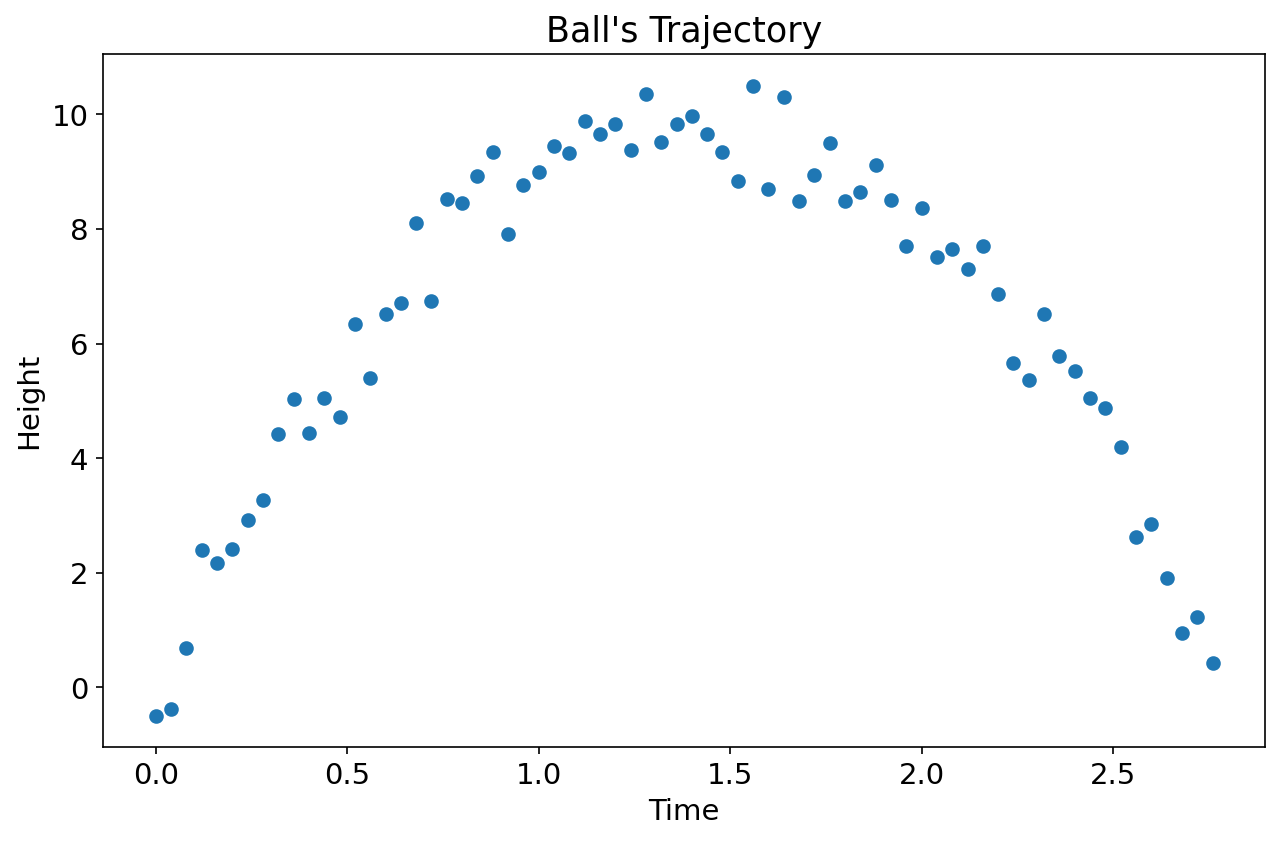

In [4]:
plt.plot(prob1[:,0], prob1[:,1], 'o')
plt.xlabel('Time')
plt.ylabel('Height')
plt.title("Ball's Trajectory")
plt.show()

- We have 1 feature ($x_1$) and one output (y), so the hypothesis function is:

$$h_w(x) = w_1 x$$


- Now adding the bias term in the hypothesis:

$$h_w(x) = w_0 + w_1 x$$


- adding the $x^2$ term, we get:

$$h_w(x) = w_0 + w_1 x + w_2 x^2$$

**Note**: writing the hypothesis function in this way is equivalent to writing it as:

$$h_w(x) = w_0 x_0 + w_1 x_1 + w_2 x_2$$

where  $x_0 = 1$, $x_1 = x$, and $x_2 = x^2$.

- The cost function is:

$$J(w) = \frac{1}{2m} \sum_{i=1}^m (h_w(x^{(i)}) - y^{(i)})^2 $$


- The gradient of the cost function is:

$$\frac{\partial J(w)}{\partial w} = \frac{1}{m} \sum_{i=1}^m (h_w(x^{(i)}) - y^{(i)}) x^{(i)}$$



- The updation rule of weights is :

$$w := w - \alpha \frac{\partial J(w)}{\partial w}$$

In [5]:
# add the quadratic term to the data (w2*x^2) to make the data set nonlinear
prob1 = np.insert(prob1, 1, prob1[:,0]**2, axis=1)

In [6]:
prob1[:5,:]

array([[ 0.00000000e+00,  0.00000000e+00, -4.94404249e-01],
       [ 4.00000000e-02,  1.60000000e-03, -3.76737743e-01],
       [ 8.00000000e-02,  6.40000000e-03,  6.76638026e-01],
       [ 1.20000000e-01,  1.44000000e-02,  2.40005210e+00],
       [ 1.60000000e-01,  2.56000000e-02,  2.16632440e+00]])

In [7]:
# Defining X and y 

X = prob1[:,:2]
y = prob1[:,2]

In [8]:
# initializing the optimization hyperparameter
alpha = 0.01
max_iter = 50000

In [9]:
# creating the instance of BatchGD ( Batch Gradient Descent ), including the bias term
batch_gd =  BatchGD(alpha=alpha, max_iter=max_iter, bias=True)

In [10]:
batch_gd.fit(X, y)

In [11]:
# optimum weights after BatchGD
batch_gd.weights

array([-0.13575303, 14.20039597, -5.04170007])

- Let's Visualize the Loss vs Iterations

In [12]:
# let's predict the given points from the trained model
batch_pred = batch_gd.predict(X)

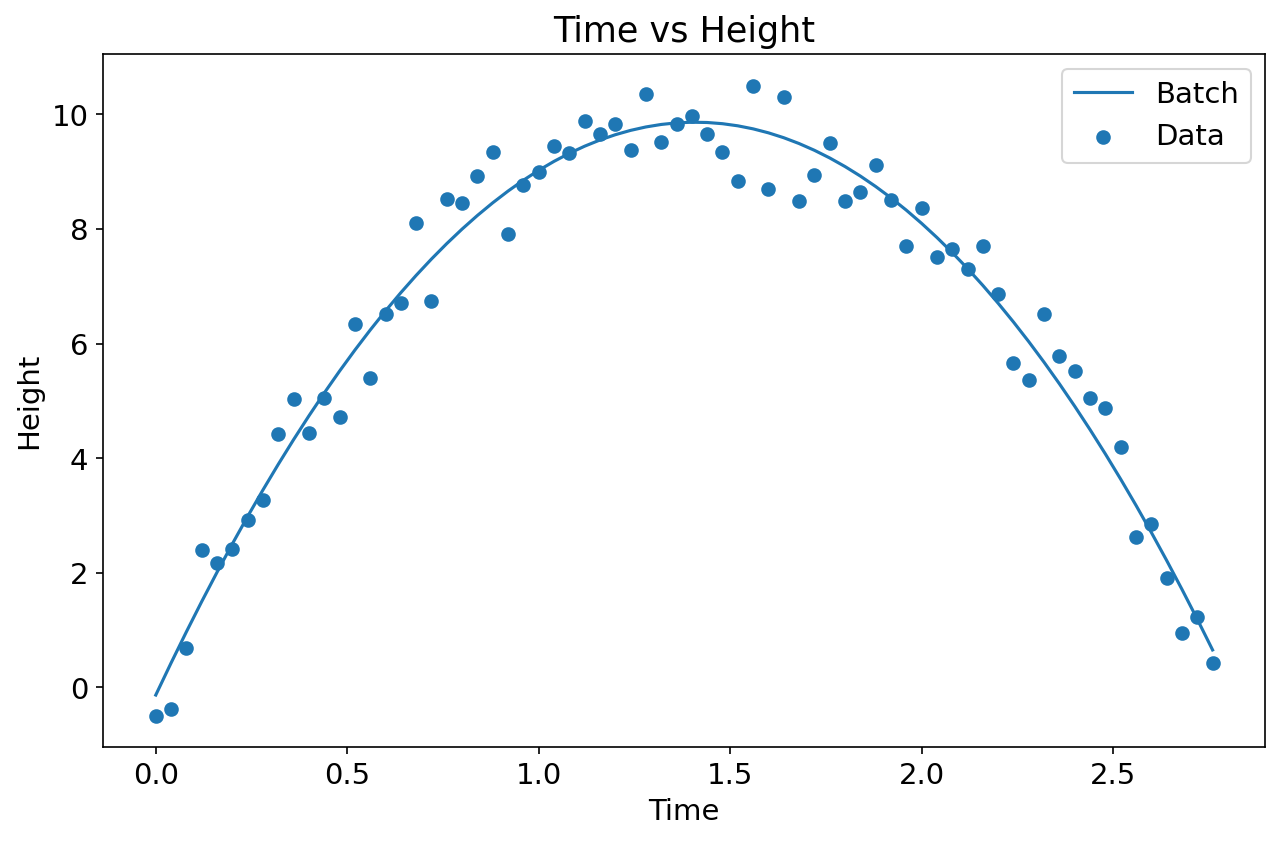

In [13]:
plt.plot(X[:,0],batch_pred, label='Batch')
plt.scatter(X[:,0],y, label="Data")
plt.xlabel('Time')
plt.ylabel('Height')
plt.title("Time vs Height")
plt.legend()
plt.show()

***

### 2. Implement stochastic gradient descent for optimization of weights. Plot cost history (J) vs number of iterations for both cases batch gradient descent and stochastic gradient descent. Comment on the difference, if any

In [14]:
# Create the instance of Stochastic GD
sch_gd = StochasticGD(alpha=alpha,max_iter=max_iter)

In [15]:
# Training the Stochastic GD model
sch_gd.fit(X,y)

In [16]:
# optimum weights after StochasticGD
sch_gd.weights

array([14.02518355, -4.96928167])

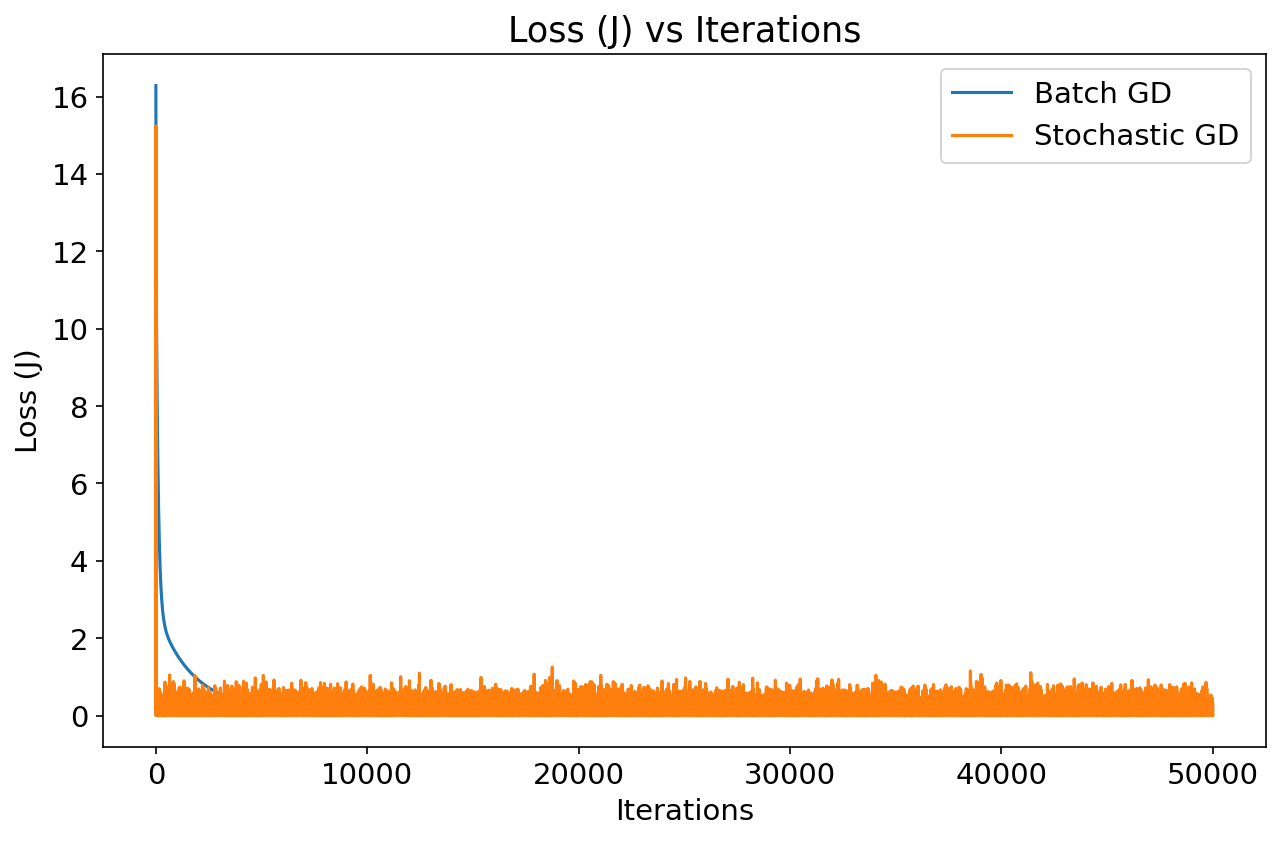

In [18]:
# Plotting the cost history
plt.plot(batch_gd.loss_history, label='Batch GD')
plt.plot(sch_gd.loss_history, label='Stochastic GD')
plt.xlabel('Iterations')
plt.ylabel('Loss (J)')
plt.title("Loss (J) vs Iterations")
plt.legend()
plt.show()

- From above graph we can see that Stochastic Gradient Descent's Loss decreased at much faster rate than the Batch GD

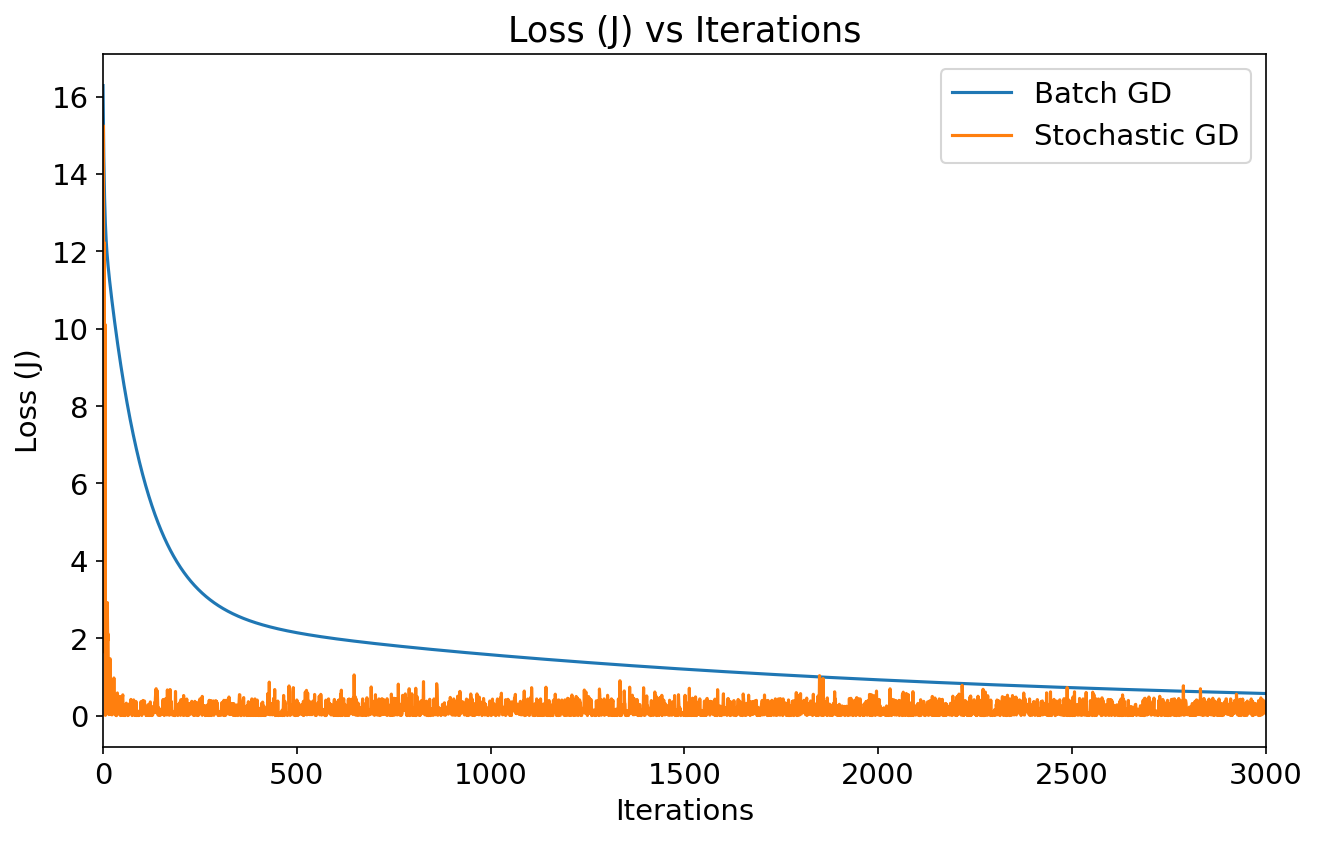

In [19]:
plt.plot(batch_gd.loss_history, label='Batch GD')
plt.plot(sch_gd.loss_history, label='Stochastic GD')
plt.xlabel('Iterations')
plt.ylabel('Loss (J)')
plt.title("Loss (J) vs Iterations")
plt.legend()
plt.xlim(0,3000)
plt.show()

- So here we can see that Stochastic GD achieved its optimum point in under 100 iterations while Batch haven't got there in about 2000 iterations

***

### 3. Plot the cost history (J) vs number of iterations for different learning rates (α = 0.1, 0.5, 0.01, 0.05). Write your inferences from the plot

- I am using here Batch Gradient descent as that was showing better result as that is not so much prone to $\alpha$ as that consider the whole data points before updating the weights 

- Ploting cost history (J) vs iteration for dirrent learning rates (Stochastic GD)

In [24]:
batch_1 = BatchGD(alpha=0.1,max_iter=max_iter)
batch_5 = BatchGD(alpha=0.5,max_iter=max_iter)
batch_01 = BatchGD(alpha=0.01,max_iter=max_iter)
batch_05 = BatchGD(alpha=0.05,max_iter=max_iter)

In [25]:
batch_1.fit(X,y);
batch_5.fit(X,y);
batch_01.fit(X,y);
batch_05.fit(X,y);

/home/shailja/Courses/Notes/Deep-Learning-for-Mechanics-APL-745/Assignments/assign_2/GradientDescent.py:82: RuntimeWarning: overflow encountered in square
  total_cost = np.sum(np.square(y_hat - y_true))
/home/shailja/.virtualenv/my_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/shailja/Courses/Notes/Deep-Learning-for-Mechanics-APL-745/Assignments/assign_2/GradientDescent.py:113: RuntimeWarning: overflow encountered in matmul
  gradient = np.matmul((y_hat- y_true), X) / m


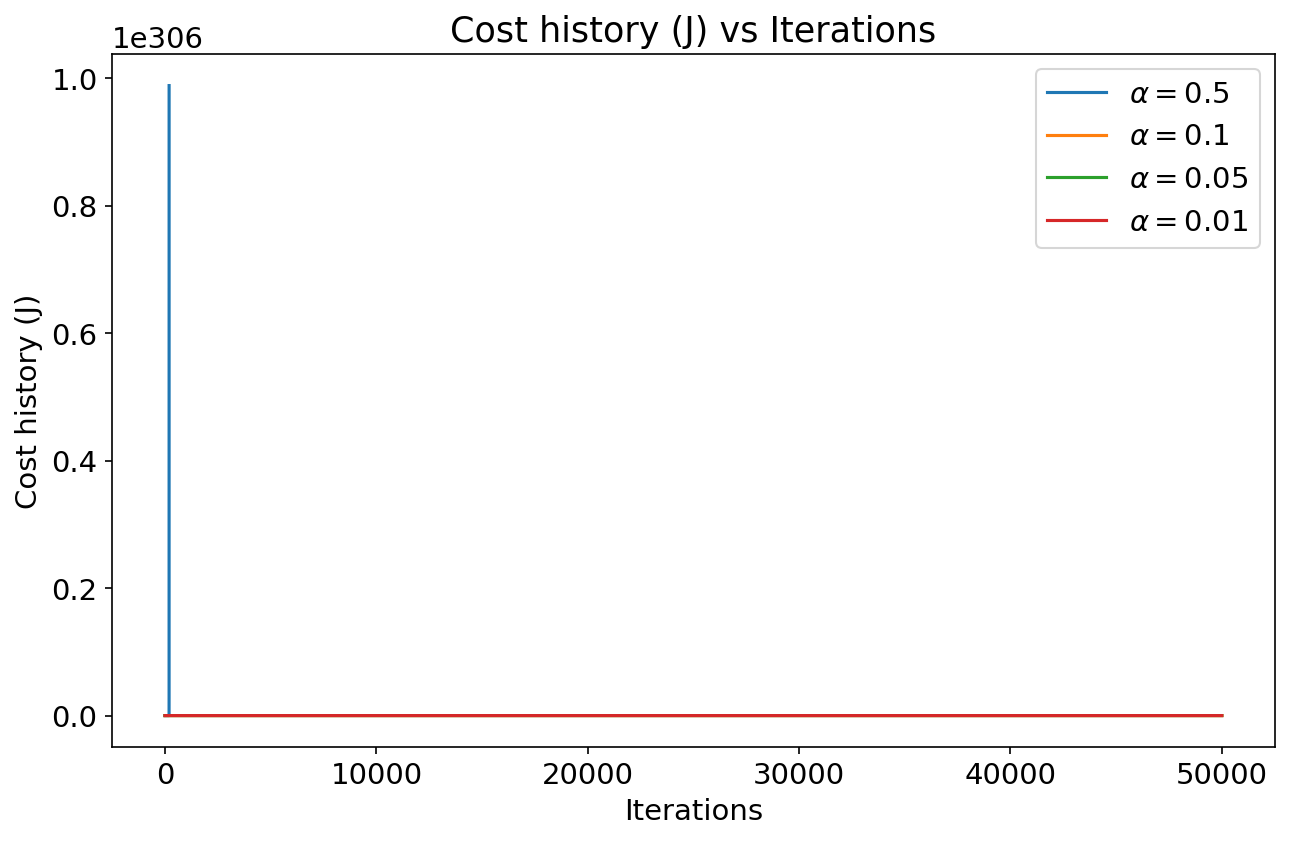

In [26]:
plt.plot(batch_5.loss_history, label='$\\alpha=0.5$')
plt.plot(batch_1.loss_history, label='$\\alpha=0.1$')
plt.plot(batch_05.loss_history, label='$\\alpha=0.05$')
plt.plot(batch_01.loss_history, label='$\\alpha=0.01$')
plt.xlabel('Iterations')
plt.ylabel('Cost history (J)')
plt.title("Cost history (J) vs Iterations")
plt.legend()
plt.show()

- So here for $\alpha$=0.01, 0.05 and 0.1 **batch Gradient Descent** Converges but for $\alpha$ = 0.5 it diverges and reaches to very large value

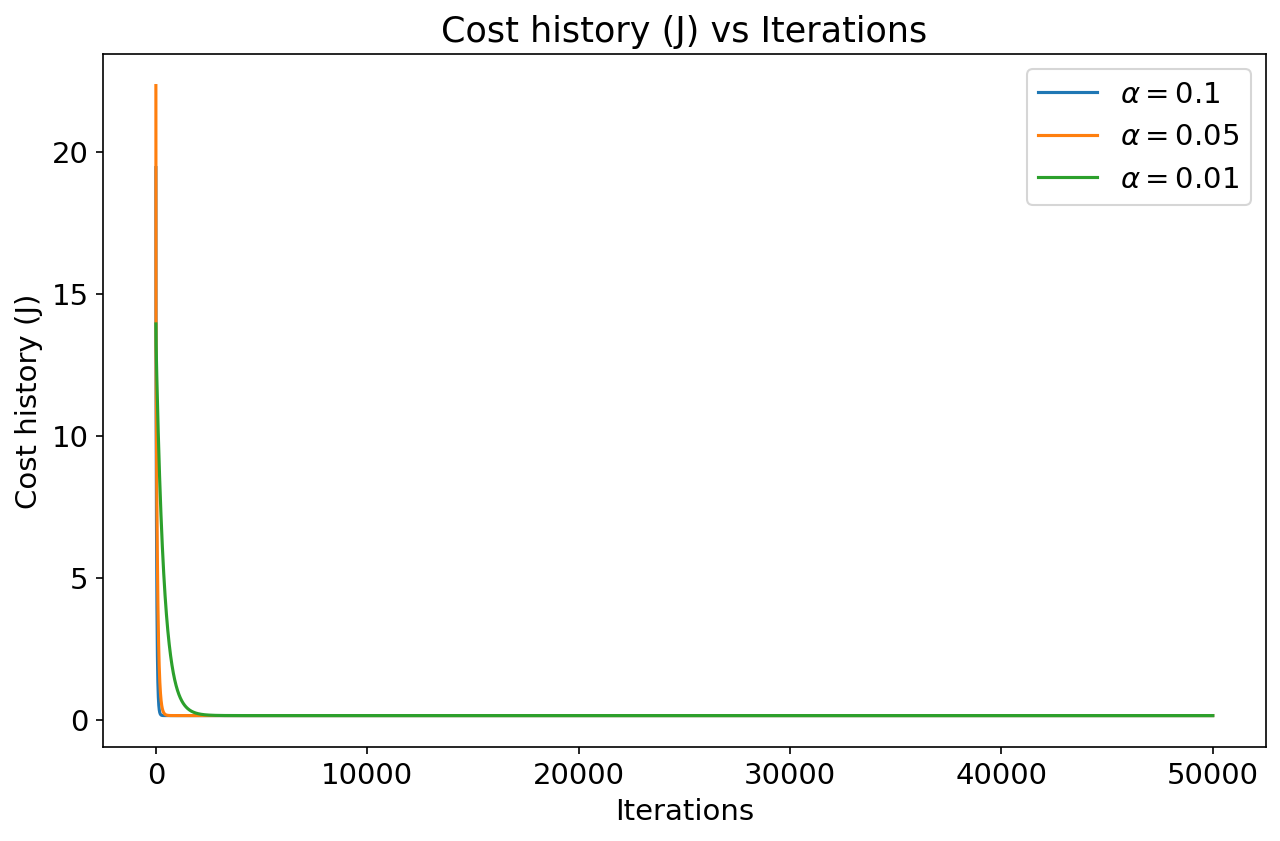

In [27]:
plt.plot(batch_1.loss_history, label='$\\alpha=0.1$')
plt.plot(batch_05.loss_history, label='$\\alpha=0.05$')
plt.plot(batch_01.loss_history, label='$\\alpha=0.01$')
plt.xlabel('Iterations')
plt.ylabel('Cost history (J)')
plt.title("Cost history (J) vs Iterations")
plt.legend()
plt.show()

- hence there is so much bounces this means that alpha is large 

***

### 4. Implement line search method (Secant method) to find learning rate (α). Optimize the weights using batch gradient descent and plot the cost history (J) vs number of iterations for variable learning rate. Comment on the difference between implementing line search method and choosing arbitrary α. 